In [57]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
from deep_dss.utils import *

import numpy as np
import healpy as hp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [119]:
%matplotlib inline

In [110]:
def load_cls(sigma8):
    
    !cd /Users/adiraju/CosMomentum/ && bash 00geninfocl.sh $sigma8 > /dev/null 2>&1
    
    new_cls = {"gg": load_cl_from_path("/Users/adiraju/CosMomentum/input/Cl-f1z1f1z1.dat"), 
           "gk": load_cl_from_path("/Users/adiraju/CosMomentum/input/Cl-f1z1f2z1.dat"), 
           "kk": load_cl_from_path("/Users/adiraju/CosMomentum/input/Cl-f2z1f2z1.dat"), 
           "kk_": load_cl_from_path("/Users/adiraju/CosMomentum/input/Cl-f2z2f2z2.dat")}
    
    old_cls = {"gg": load_cl_from_val(sigma8, name="f1z1f1z1", lmax=9999), 
           "gk": load_cl_from_val(sigma8, name="f1z1f2z1", lmax=9999), 
           "kk": load_cl_from_val(sigma8, name="f2z1f2z1", lmax=9999), 
           "kk_": load_cl_from_val(sigma8, name="f2z2f2z2", lmax=9999)}
    
    return old_cls, new_cls

In [ ]:
old_cls, new_cls = load_cls(0.85)

In [100]:
def print_fields_info(sigma8):
    print("Old fields info file: \n")
    
    !cat ../data/flask/input/dss-20-0.28-$sigma8-1.54/dss-20-0.28-$sigma8-1.54-info.dat
    
    print("\n New fields info file: \n")
    
    !cd /Users/adiraju/CosMomentum/ && bash 00geninfocl.sh $sigma8 > /dev/null 2>&1
    !cat /Users/adiraju/CosMomentum/input/info.dat

In [101]:
print_fields_info(0.85)

Old fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.6818505917e-01      1   0.2000   0.4500
    2    1   0.0000   1.7768541733e-02      2   0.2000   0.4500
    2    2   0.0000   1000.               2   0.0000   2.0000

 New fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.69701e-01      1   0.2000   0.4500
    2    1   0.0000   2.64910e-02      2   0.2000   0.4500
    2    2   0.0000   4.10573e-02      2   0.0000   2.0000


In [102]:
print_fields_info(0.5)

Old fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.5671806473e-01      1   0.2000   0.4500
    2    1   0.0000   1.7781312981e-02      2   0.2000   0.4500
    2    2   0.0000   1000.               2   0.0000   2.0000

 New fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.58376e-01      1   0.2000   0.4500
    2    1   0.0000   2.65116e-02      2   0.2000   0.4500
    2    2   0.0000   4.62849e-02      2   0.0000   2.0000


In [103]:
print_fields_info(1.2)

Old fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.8361681788e-01      1   0.2000   0.4500
    2    1   0.0000   1.7853466848e-02      2   0.2000   0.4500
    2    2   0.0000   1000.               2   0.0000   2.0000

 New fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.84949e-01      1   0.2000   0.4500
    2    1   0.0000   2.66130e-02      2   0.2000   0.4500
    2    2   0.0000   3.76192e-02      2   0.0000   2.0000


In [138]:
def plot_all_cls(sigma8):
    
    def plot_cl(ax, old_cl, new_cl, lmax=3000, title=""):
        
        ax.set_title(title)
        ax.set_xlabel("Angular Scale, l")
        ax.set_ylabel("Power, C(l)")
        ax.set_yscale("log")
        ax.plot(old_cl["L"].to_numpy()[:lmax], old_cl["CL"].to_numpy()[:lmax], "b-",
                label="trough_lenser")
        ax.plot(new_cl["L"].to_numpy()[:lmax], new_cl["CL"].to_numpy()[:lmax], "r-",
                label="CosMomentum")
        ax.legend()
    
    old_cls, new_cls = load_cls(sigma8)
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    
    plot_cl(axs[0,0], old_cls["gg"], new_cls["gg"], title="Matter x Matter")
    plot_cl(axs[0,1], old_cls["gk"], new_cls["gk"], title="Matter x Kappa")
    plot_cl(axs[1,0], old_cls["kk"], new_cls["kk"], title="Kappa x Kappa")
    plot_cl(axs[1,1], old_cls["kk_"], new_cls["kk_"], title="Uncorrelated Kappa x Uncorrelated Kappa")
    fig.suptitle(r"Angular Power Spectra for $\sigma_8 = {}$".format(sigma8), fontsize=18)
    fig.show()
    

In [140]:
def plot_all_psds(sigma8):
    
    def plot_psd(ax, old_cl, new_cl, lmax=3000, title=""):
        
        ax.set_title(title)
        ax.set_xlabel("Angular Scale, l")
        ax.set_ylabel("Power Spectral Density, C(l)*l*(l+1)")
#         ax.set_yscale("log")
        ax.plot(old_cl["L"].to_numpy()[:lmax], old_cl["CL"].to_numpy()[:lmax]*old_cl["L"].to_numpy()[:lmax]
                *(old_cl["L"].to_numpy()[:lmax]+1), "b-", label="trough_lenser")
        ax.plot(new_cl["L"].to_numpy()[:lmax], new_cl["CL"].to_numpy()[:lmax]*new_cl["L"].to_numpy()[:lmax]
                *(new_cl["L"].to_numpy()[:lmax]+1), "r-", label="CosMomentum")
        ax.legend()
    
    old_cls, new_cls = load_cls(sigma8)
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    plot_psd(axs[0,0], old_cls["gg"], new_cls["gg"], title="Matter x Matter")
    plot_psd(axs[0,1], old_cls["gk"], new_cls["gk"], title="Matter x Kappa")
    plot_psd(axs[1,0], old_cls["kk"], new_cls["kk"], title="Kappa x Kappa")
    plot_psd(axs[1,1], old_cls["kk_"], new_cls["kk_"], title="Uncorrelated Kappa x Uncorrelated Kappa")
    fig.suptitle(r"Power Spectral Densities for $\sigma_8 = {}$".format(sigma8), fontsize=18)
    fig.show()
    

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


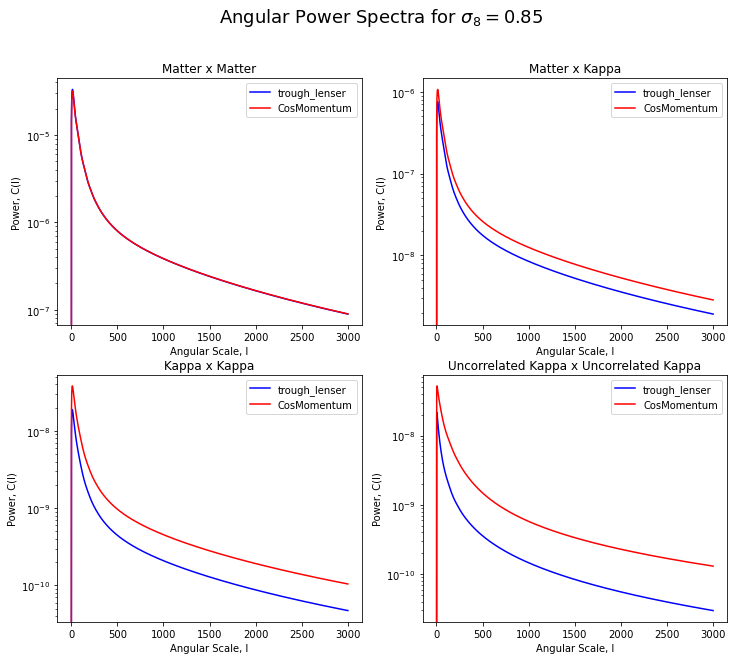

In [141]:
plot_all_cls(0.85)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


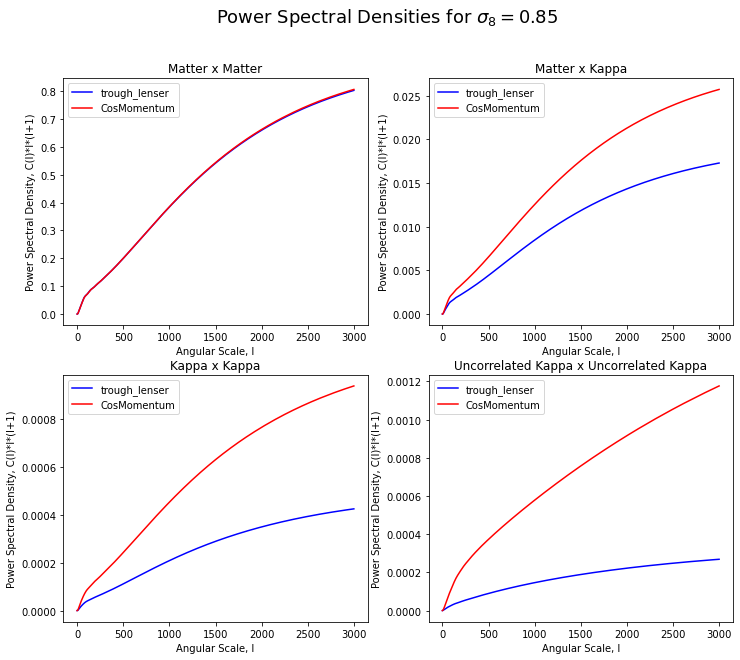

In [142]:
plot_all_psds(0.85)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


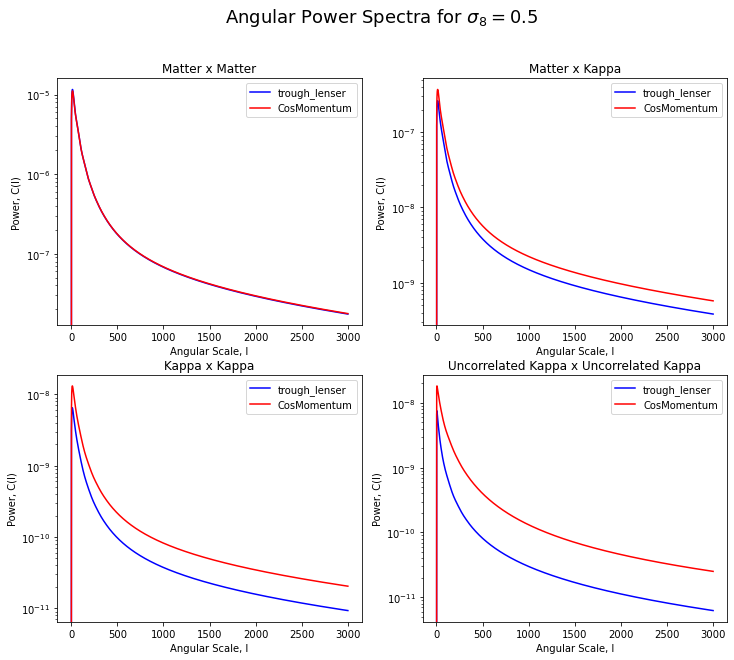

In [143]:
plot_all_cls(0.5)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


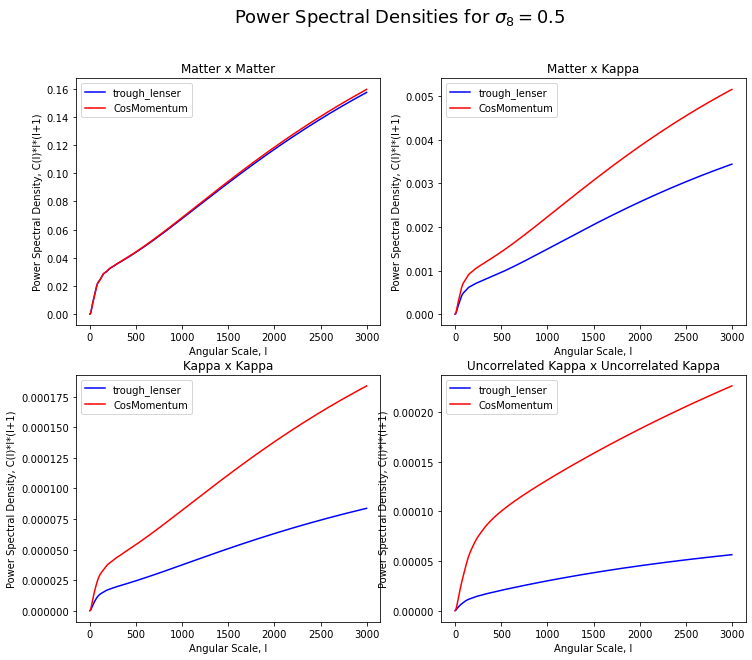

In [144]:
plot_all_psds(0.5)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


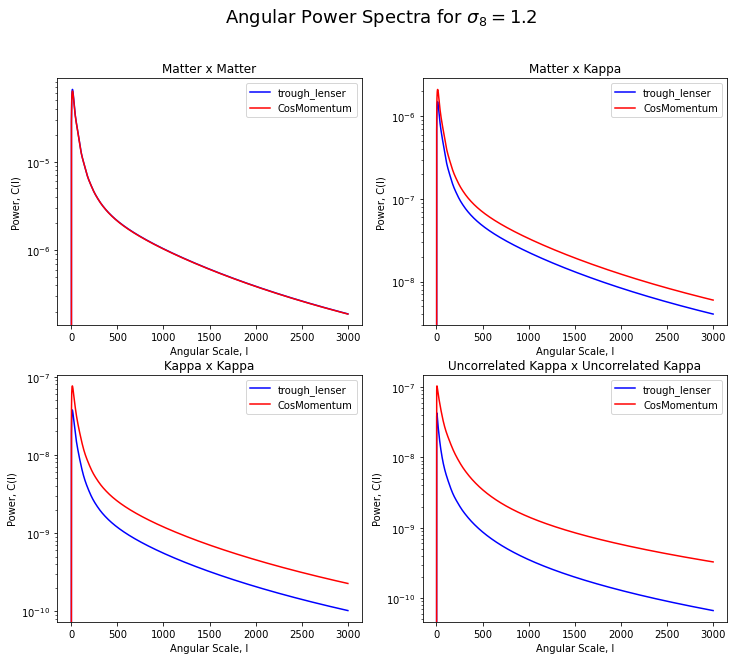

In [145]:
plot_all_cls(1.2)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


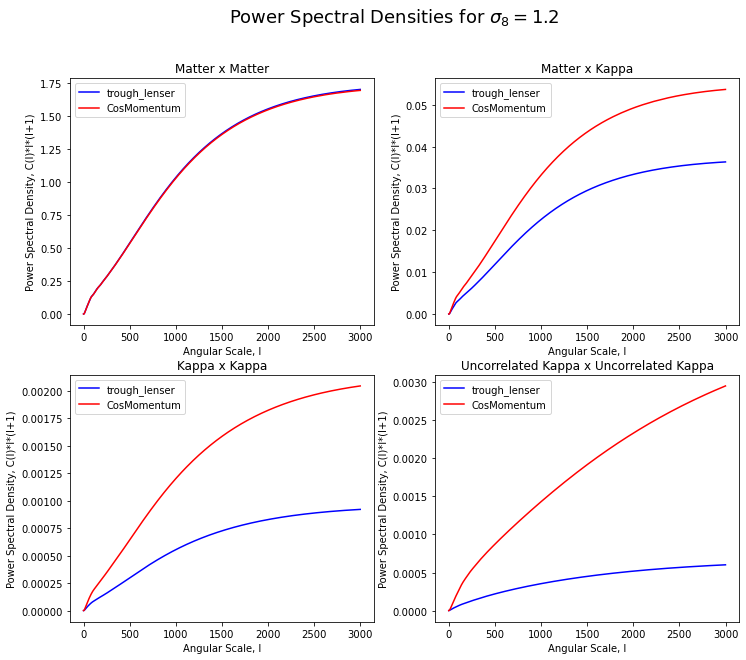

In [146]:
plot_all_psds(1.2)

In [148]:
m = hp.read_map("/Users/adiraju/output/map-f1z1.fits", nest=True)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


In [149]:
m = hp.ud_grade(m, 1024, order_in="NEST", order_out="NEST")

In [150]:
m.shape

(12582912,)

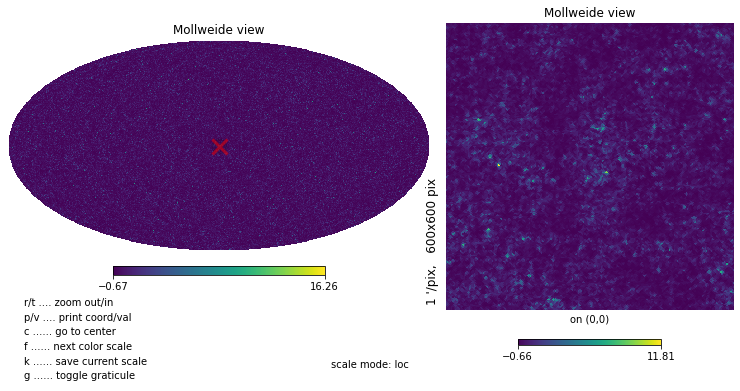

In [156]:
hp.mollzoom(m, nest=True)

In [179]:
kg = hp.read_map("/Users/adiraju/output/kappa-gamma-f2z2.fits", nest=True, field=0)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


In [180]:
kg = hp.ud_grade(kg, 1024, order_in="NEST", order_out="NEST")

In [162]:
n = hp.read_map("/Users/adiraju/deep_dss/data/flask/output/dss-20-0.28-0.85-1.54/map-f1z1.fits.gz", nest=True)

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


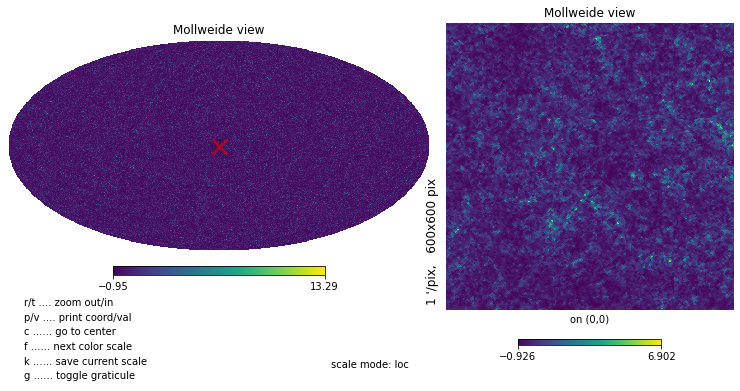

In [163]:
hp.mollzoom(n, nest=True)

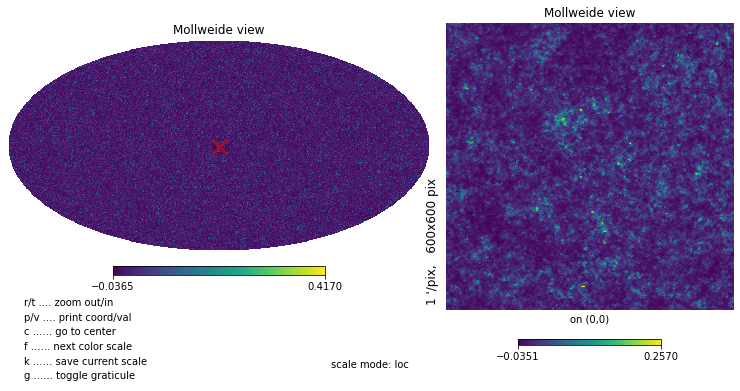

In [182]:
hp.mollzoom(kg, nest=True)

In [181]:
kg2 = hp.read_map("/Users/adiraju/deep_dss/data/flask/output/dss-20-0.28-0.85-1.54/kappa-gamma-f2z1.fits.gz", nest=True, field=0)

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


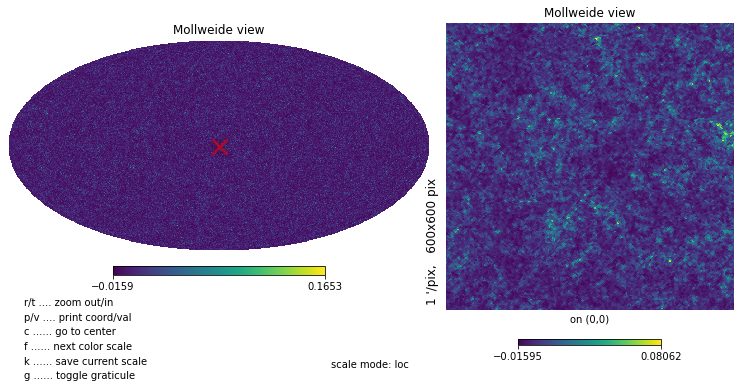

In [183]:
hp.mollzoom(kg2, nest=True)

In [184]:
kg.shape

(12582912,)

In [185]:
kg2.shape

(12582912,)

[-0.05       -0.04999751 -0.04999503 ...  0.49994036  0.49997018
  0.5       ]


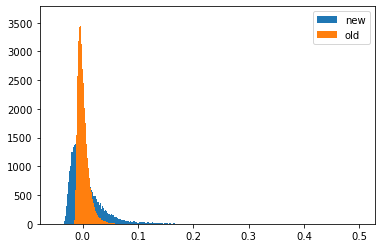

In [195]:
bins = np.geomspace(0.05, 0.6, num=50000) - 0.1
print(bins)

plt.hist(kg, bins, label="new")
plt.hist(kg2, bins, label="old")
plt.legend()